In [21]:
import glob
import os
import time
from scipy.io import loadmat
import cobra
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
df= pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/Islet data/DataFrames/AllConditions_DataFrame.csv')
df= df.set_index('symbol')
df

,IGT_GSM5009231_DP005,IGT_GSM5009232_DP007,IGT_GSM5009233_DP008,IGT_GSM5009237_DP013,IGT_GSM5009241_DP025,IGT_GSM5009249_DP048,IGT_GSM5009251_DP051,IGT_GSM5009258_DP059,IGT_GSM5009260_DP063,IGT_GSM5009264_DP067,...,T3cD_GSM5009324_DP152,T3cD_GSM5009326_DP160,T3cD_GSM5009328_DP162,T3cD_GSM5009331_DP167,T3cD_GSM5009332_DP169,T3cD_GSM5009333_DP170,T3cD_GSM5009335_DP174,T3cD_GSM5009336_DP176,T3cD_GSM5009339_DP180,T3cD_GSM5009354_DP208
symbol,,,,,,,,,,,,,,,,,,,,,
TSPAN6,438,118,567,342,183,113,341,377,455,186,...,311,638,884,631,973,717,285,619,422,412
TNMD,0,0,1,7,2,0,0,2,0,0,...,1,0,3,0,0,0,4,7,0,0
DPM1,518,570,892,558,606,686,597,1079,835,565,...,914,1365,1092,1208,882,868,1066,940,1165,1060
SCYL3,249,308,285,351,207,314,222,554,320,170,...,217,335,374,348,344,385,298,304,366,306
C1orf112,43,32,43,56,56,65,49,80,41,40,...,55,37,71,31,98,111,37,24,59,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TUSC2P1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
H2BK1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LOC101928523,2,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,6,0,0


In [13]:
IGT_df = df.filter(regex='^IGT', axis=1).iloc[:, :8]
IGT_df

,IGT_GSM5009231_DP005,IGT_GSM5009232_DP007,IGT_GSM5009233_DP008,IGT_GSM5009237_DP013,IGT_GSM5009241_DP025,IGT_GSM5009249_DP048,IGT_GSM5009251_DP051,IGT_GSM5009258_DP059
symbol,,,,,,,,
TSPAN6,438,118,567,342,183,113,341,377
TNMD,0,0,1,7,2,0,0,2
DPM1,518,570,892,558,606,686,597,1079
SCYL3,249,308,285,351,207,314,222,554
C1orf112,43,32,43,56,56,65,49,80
...,...,...,...,...,...,...,...,...
TUSC2P1,0,0,0,0,0,0,0,0
H2BK1,1,0,0,0,0,0,0,0
LOC101928523,2,0,0,0,0,0,0,2


In [12]:
ND_df = df.filter(regex='^ND', axis=1).iloc[:, :8]
ND_df

,ND_GSM5009234_DP010,ND_GSM5009235_DP011,ND_GSM5009236_DP012,ND_GSM5009239_DP019,ND_GSM5009240_DP021,ND_GSM5009252_DP052,ND_GSM5009254_DP054,ND_GSM5009261_DP064
symbol,,,,,,,,
TSPAN6,188,198,343,214,400,528,536,246
TNMD,0,0,0,0,21,0,0,0
DPM1,697,595,503,683,552,1609,1007,461
SCYL3,232,229,140,300,188,347,424,347
C1orf112,119,85,27,101,46,35,125,105
...,...,...,...,...,...,...,...,...
TUSC2P1,0,0,0,0,0,0,0,0
H2BK1,0,0,0,0,0,0,0,0
LOC101928523,0,0,0,0,0,0,6,0


In [14]:
T2D_df = df.filter(regex='^T2D', axis=1).iloc[:, :8]
T2D_df

,T2D_GSM5009230_DP003,T2D_GSM5009243_DP030,T2D_GSM5009244_DP034,T2D_GSM5009247_DP042,T2D_GSM5009250_DP049,T2D_GSM5009255_DP055,T2D_GSM5009257_DP058,T2D_GSM5009267_DP070
symbol,,,,,,,,
TSPAN6,267,236,330,467,339,287,106,106
TNMD,10,0,0,0,0,0,0,0
DPM1,606,565,432,584,475,955,212,127
SCYL3,186,304,274,335,207,319,51,60
C1orf112,84,56,45,32,35,41,17,3
...,...,...,...,...,...,...,...,...
TUSC2P1,0,0,0,0,0,0,0,0
H2BK1,0,0,0,0,0,0,0,0
LOC101928523,0,0,10,0,0,0,1,0


In [15]:
T3cD_df = df.filter(regex='^T3cD', axis=1).iloc[:, :8]
T3cD_df

,T3cD_GSM5009229_DP002,T3cD_GSM5009238_DP017,T3cD_GSM5009242_DP028,T3cD_GSM5009245_DP039,T3cD_GSM5009246_DP040,T3cD_GSM5009248_DP043,T3cD_GSM5009253_DP053,T3cD_GSM5009256_DP057
symbol,,,,,,,,
TSPAN6,529,365,118,373,453,161,552,458
TNMD,0,0,0,4,5,0,0,2
DPM1,412,479,422,393,594,956,1119,797
SCYL3,274,223,426,297,165,131,323,335
C1orf112,37,87,16,49,18,72,55,66
...,...,...,...,...,...,...,...,...
TUSC2P1,0,0,0,0,0,0,0,0
H2BK1,0,0,0,0,0,0,0,0
LOC101928523,0,0,0,0,0,0,0,0


symbol
TSPAN6          331.625
TNMD              2.625
DPM1            763.375
SCYL3           275.875
C1orf112         80.375
                 ...   
TUSC2P1           0.000
H2BK1             0.000
LOC101928523      0.750
LOC112267968      3.500
MKKS              0.000
Length: 35089, dtype: float64

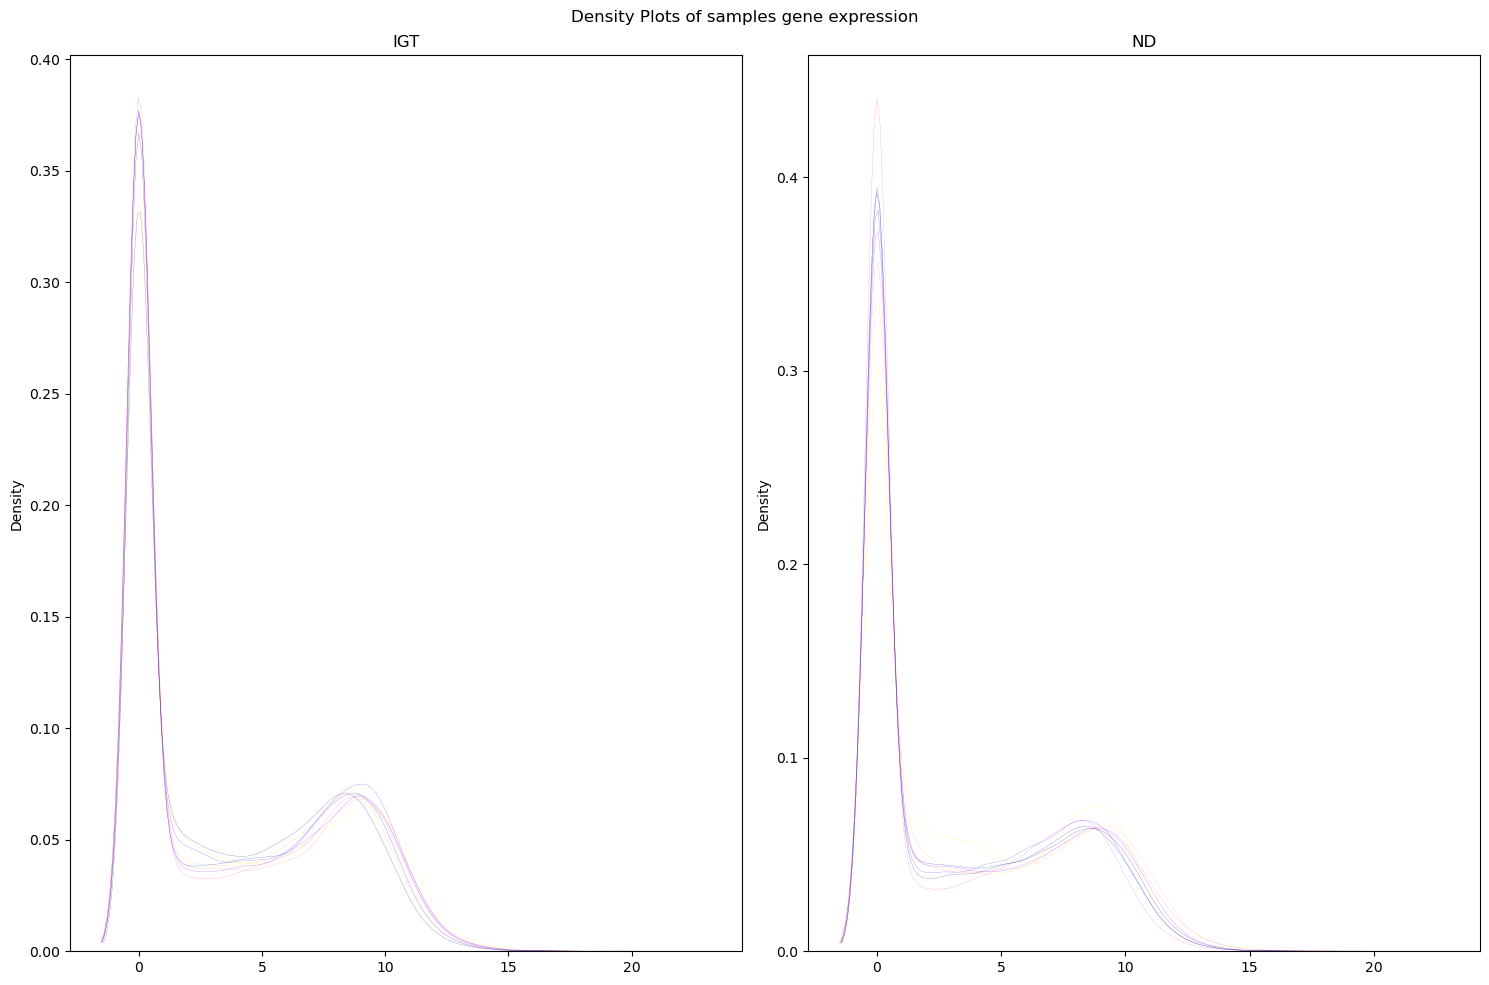

In [22]:
log_IGT = np.log2(IGT_df + 1)
log_ND = np.log2(ND_df + 1)
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 10))

sns.kdeplot(data = log_IGT, ax = axes[0], common_norm = False, legend = False, palette = "gnuplot2", linewidth = .2, alpha = .6)
axes[0].set_title('IGT')
sns.kdeplot(data = log_ND, ax = axes[1], common_norm = False, legend = False, palette = "gnuplot2", linewidth = .2, alpha = .6)
axes[1].set_title('ND')

plt.suptitle('Density Plots of samples gene expression')
plt.tight_layout()